In [9]:
from bs4 import BeautifulSoup
import requests
import os
import shutil # zip
import re
import nltk
from gensim import corpora
from gensim.utils import simple_preprocess
nltk.download('stopwords', download_dir='utils/nltk_data') # TODO verificar que existe el folder
from nltk.corpus import stopwords
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to utils/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# TODO modificar para evitar errores
wikipedia_links = []
file_path = "WikiURLs.txt"
with open(file_path, "r", encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        if "wikipedia.org" in line:
            wikipedia_links.append(line)
        elif len(line) > 0:
            print(f"Topic: {line}")

Topic: Culture
Topic: Geography
Topic: Health
Topic: History
Topic: Technology


In [3]:
for link in wikipedia_links:
    res = requests.get(link)
    soup = BeautifulSoup(res.text, 'html.parser')

    output_dir = "HTMLResults/" + link.split("/wiki/")[-1].replace("_", " ") + ".txt"
    os.makedirs(os.path.dirname(output_dir), exist_ok=True)
    with open(output_dir, "w", encoding='utf-8') as file:
        file.write(soup.prettify())

    print(f"Data saved to {output_dir}")

Data saved to HTMLResults/Art.txt
Data saved to HTMLResults/Music.txt
Data saved to HTMLResults/Literature.txt
Data saved to HTMLResults/Dance.txt
Data saved to HTMLResults/Film.txt
Data saved to HTMLResults/Theatre.txt
Data saved to HTMLResults/Cuisine.txt
Data saved to HTMLResults/Fashion.txt
Data saved to HTMLResults/Architecture.txt
Data saved to HTMLResults/Photography.txt
Data saved to HTMLResults/Earth.txt
Data saved to HTMLResults/Continent.txt
Data saved to HTMLResults/Country.txt
Data saved to HTMLResults/Mountain.txt
Data saved to HTMLResults/River.txt
Data saved to HTMLResults/Desert.txt
Data saved to HTMLResults/Ocean.txt
Data saved to HTMLResults/Climate.txt
Data saved to HTMLResults/Ecosystem.txt
Data saved to HTMLResults/Map.txt
Data saved to HTMLResults/Medicine.txt
Data saved to HTMLResults/Nutrition.txt
Data saved to HTMLResults/Physical exercise.txt
Data saved to HTMLResults/Mental health.txt
Data saved to HTMLResults/Disease.txt
Data saved to HTMLResults/Vaccinatio

In [4]:
input_dir = "HTMLResults"
output_dir = "TextExtractionResults"

for filename in os.listdir(input_dir):
    input_file_path = os.path.join(input_dir, filename)
    os.makedirs(output_dir, exist_ok=True)
    with open(input_file_path, "r", encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')

    headings = [heading.get_text(strip=True, separator=" ") for heading in soup.find_all(["h1", "h2", "h3", "h4", "h5", "h6"])]
    paragraphs = [p.get_text(strip=True, separator=" ") for p in soup.find_all("p")]

    output_content = "\n".join(headings) + "\n\n" + "\n".join(paragraphs)
    output_file_path = os.path.join(output_dir, filename)
    with open(output_file_path, "w", encoding='utf-8') as file:
        file.write(output_content)
    print(f"Data saved to {output_file_path}")

Data saved to TextExtractionResults/Map.txt
Data saved to TextExtractionResults/Renaissance.txt
Data saved to TextExtractionResults/Artificial intelligence.txt
Data saved to TextExtractionResults/Country.txt
Data saved to TextExtractionResults/Music.txt
Data saved to TextExtractionResults/Computer science.txt
Data saved to TextExtractionResults/Vaccination.txt
Data saved to TextExtractionResults/Medicine.txt
Data saved to TextExtractionResults/Nanotechnology.txt
Data saved to TextExtractionResults/Photography.txt
Data saved to TextExtractionResults/Earth.txt
Data saved to TextExtractionResults/Cuisine.txt
Data saved to TextExtractionResults/Desert.txt
Data saved to TextExtractionResults/Dance.txt
Data saved to TextExtractionResults/Internet.txt
Data saved to TextExtractionResults/Theatre.txt
Data saved to TextExtractionResults/Disease.txt
Data saved to TextExtractionResults/Public health.txt
Data saved to TextExtractionResults/Continent.txt
Data saved to TextExtractionResults/Climate.t

In [5]:
html_zip_file_path = "HTMLExtractionResults.zip"
text_zip_file_path = "TextExtractionResults.zip"
shutil.make_archive("HTMLExtractionResults", 'zip', output_dir)
shutil.make_archive("TextExtractionResults", 'zip', output_dir)
print(f"Zip file created: {html_zip_file_path}, {text_zip_file_path}")

Zip file created: HTMLExtractionResults.zip, TextExtractionResults.zip


In [6]:
nltk.data.path.append('utils/nltk_data')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
input_dir = "TextExtractionResults"

documents = []

def preprocess_text(text):
            text = text.lower()
            text = re.sub(r'[\W_]+', ' ', text)
            tokens = simple_preprocess(text, deacc=False)
            tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
            return tokens

for filename in os.listdir(input_dir):
    input_file_path = os.path.join(input_dir, filename)

    with open(input_file_path, "r", encoding='utf-8') as input_file:
        text = input_file.readlines()

        for line in text:
            line = line.strip()
            if line:
                tokens = preprocess_text(line)
                if tokens:
                    documents.append(tokens)

if not documents:
    print(f"No valid documents found")
else:
    dictionary = corpora.Dictionary(documents)
    corpus_bow = [dictionary.doc2bow(doc) for doc in documents]



In [7]:
num_topics = 5
lda_model = LdaModel(
    corpus=corpus_bow,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    update_every=1,
    chunksize=100,
    alpha='auto',
    per_word_topics=True
)

In [8]:

coherence_model_lda = CoherenceModel(
    model=lda_model,
    texts=documents,
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model_lda.get_coherence()
print(f"Coherencia: {coherence_score}")


for idx, topic in lda_model.show_topics(formatted=False, num_words=5):
    print(f"Topic #{idx}: {[w for w, _ in topic]}")

display(lda_model.print_topics())

Coherencia: 0.46617730358972126
Topic #0: ['ecosystem', 'ecosystems', 'water', 'energy', 'plants']
Topic #1: ['computer', 'system', 'security', 'systems', 'technology']
Topic #2: ['also', 'film', 'may', 'known', 'often']
Topic #3: ['soviet', 'united', 'states', 'government', 'attack']
Topic #4: ['war', 'german', 'century', 'first', 'germany']


[(0,
  '0.026*"ecosystem" + 0.016*"ecosystems" + 0.010*"water" + 0.010*"energy" + 0.009*"plants" + 0.008*"mountains" + 0.007*"nitrogen" + 0.007*"mountain" + 0.007*"iron" + 0.007*"animals"'),
 (1,
  '0.018*"computer" + 0.013*"system" + 0.012*"security" + 0.010*"systems" + 0.008*"technology" + 0.007*"data" + 0.006*"use" + 0.006*"information" + 0.006*"support" + 0.006*"access"'),
 (2,
  '0.013*"also" + 0.011*"film" + 0.009*"may" + 0.009*"known" + 0.008*"often" + 0.007*"human" + 0.007*"used" + 0.007*"time" + 0.007*"include" + 0.006*"production"'),
 (3,
  '0.016*"soviet" + 0.015*"united" + 0.011*"states" + 0.010*"government" + 0.009*"attack" + 0.009*"union" + 0.007*"troops" + 0.006*"law" + 0.006*"russia" + 0.006*"august"'),
 (4,
  '0.014*"war" + 0.007*"german" + 0.007*"century" + 0.007*"first" + 0.006*"germany" + 0.006*"around" + 0.006*"empire" + 0.006*"world" + 0.005*"new" + 0.005*"literature"')]

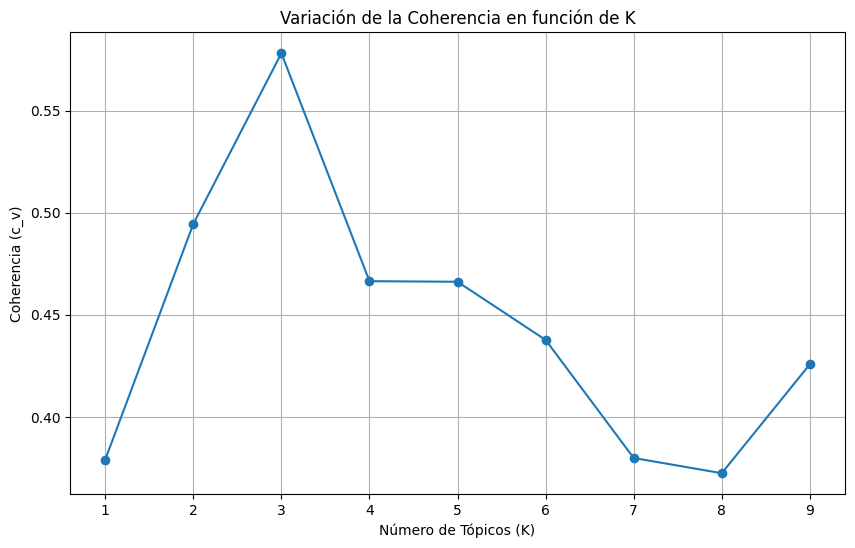

In [10]:
k_values = range(1, 10)
coherence_scores = []

for k in k_values:
    lda_model = LdaModel(
        corpus=corpus_bow,
        id2word=dictionary,
        num_topics=k,
        random_state=42,
        passes=10,
        update_every=1,
        chunksize=100,
        alpha='auto',
        per_word_topics=True
    )
    coherence_model_lda = CoherenceModel(
        model=lda_model,
        texts=documents,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)

plt.figure(figsize=(10, 6))
plt.plot(k_values, coherence_scores, marker='o')
plt.xlabel("Número de Tópicos (K)")
plt.ylabel("Coherencia (c_v)")
plt.title("Variación de la Coherencia en función de K")
plt.xticks(k_values)
plt.grid(True)
plt.show()